<a href="https://colab.research.google.com/github/fjme95/aplicaciones-financieras/blob/main/Modulo%202/Semana%203/ARIMA_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencias

In [ ]:
!pip install -U plotly

     |████████████████████████████████| 26.5 MB 23.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
from pprint import pprint

import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

import matplotlib.pyplot as plt

import plotly.express as px
import plotly.io as pio

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pio.templates.default = 'plotly_white'

# Datos

In [ ]:
bitcoin_prices = pd.read_feather('https://github.com/fjme95/datasets/blob/main/bitcoin_open_prices.feather?raw=true').set_index('Timestamp')
bitcoin_prices

,price
Timestamp,
1325317920,4.39
1325346600,4.39
1325350740,4.50
1325350800,4.58
1325391360,4.58
...,...
1348881420,12.16
1348881480,12.16
1348881540,12.16


## Visualización

In [ ]:
px.line(bitcoin_prices)

## Prueba de Dickey-Fuller Aumentada

In [ ]:
adf_results = adfuller(bitcoin_prices.price.values)
pprint(dict(zip(['Statistic', 'P-value', 'No. lags', 'Observations', 'Critical values'], adf_results)))

{'Critical values': {'1%': -3.430787281716851,
                     '10%': -2.5668728674069023,
                     '5%': -2.8617332595612184},
 'No. lags': 42,
 'Observations': 14957,
 'P-value': 0.8051665207108514,
 'Statistic': -0.8462215708460852}


## Diferenciación

In [ ]:
bitcoin_diff = np.diff(bitcoin_prices.price)
bitcoin_diff

array([ 0.  ,  0.11,  0.08, ...,  0.  , -0.01,  0.1 ])

In [ ]:
px.line(bitcoin_diff)

### ADF test

In [ ]:
adf_results = adfuller(bitcoin_diff)
pprint(dict(zip(['Statistic', 'P-value', 'No. lags', 'Observations', 'Critical values'], adf_results)))

{'Critical values': {'1%': -3.430787281716851,
                     '10%': -2.5668728674069023,
                     '5%': -2.8617332595612184},
 'No. lags': 41,
 'Observations': 14957,
 'P-value': 0.0,
 'Statistic': -18.919605161080394}


## Descomposición

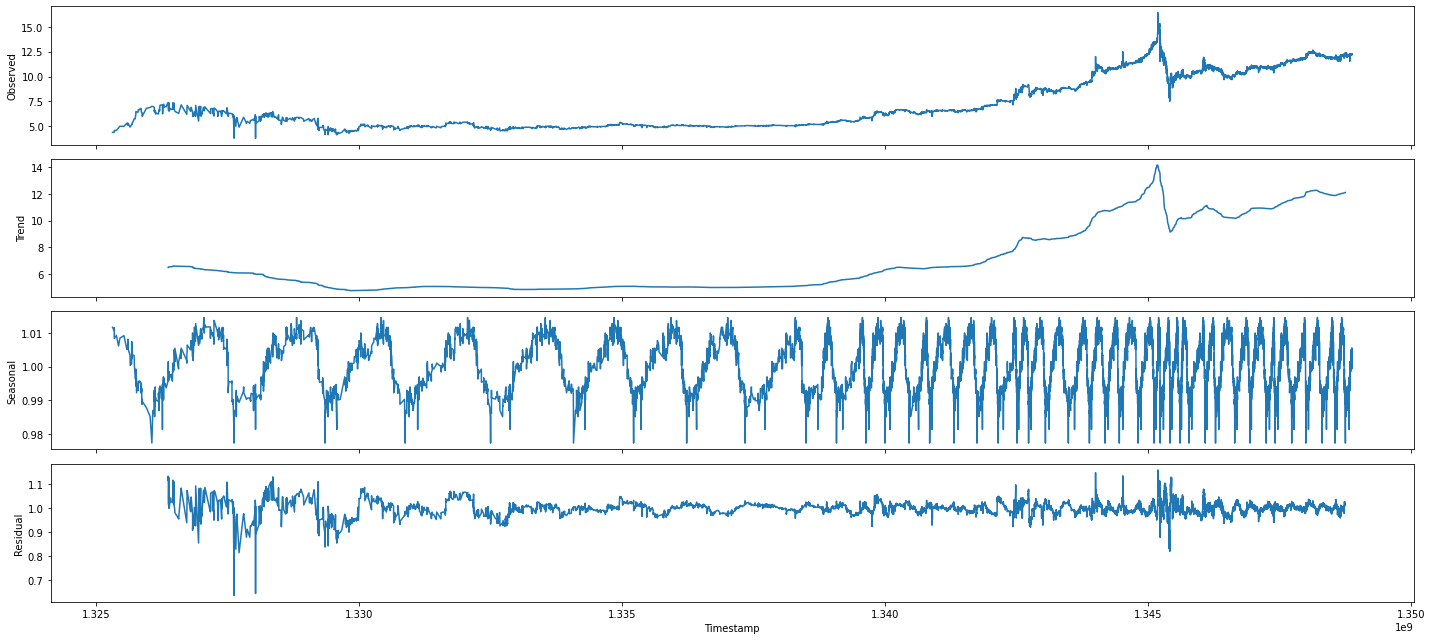

In [ ]:
# El parámetro freq es el número de mediciones por unidad de tiempo
decomposition  = sm.tsa.seasonal_decompose(bitcoin_prices, freq = 360, model = 'multiplicative')

plt.rcParams["figure.figsize"] = (20,9)
fig = decomposition.plot()
fig.show()

## Autocorrelación

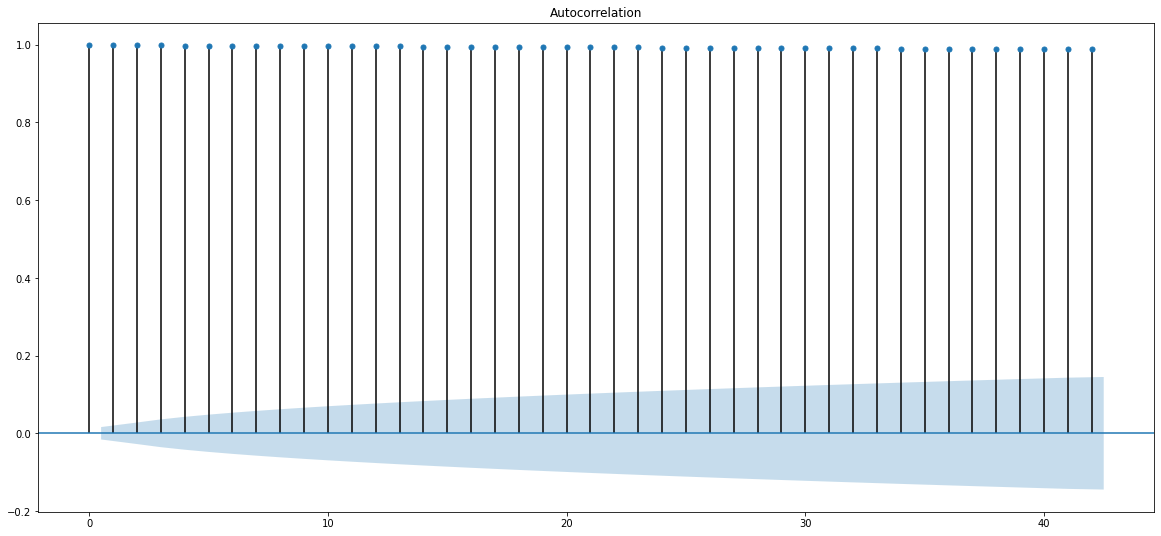

In [ ]:
tsaplots.plot_acf(bitcoin_prices.price)
plt.show()

## Autocorrelación parcial

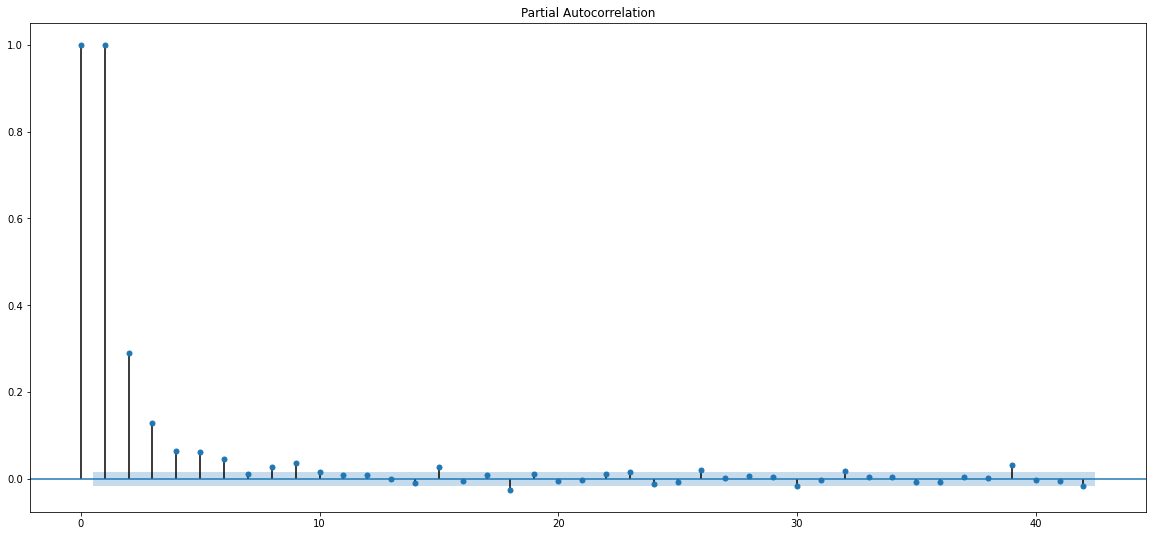

In [ ]:
tsaplots.plot_pacf(bitcoin_prices.price)
plt.show()

Probaremos con un modelo ARMA(1,0)

# Modelo ARMA

In [ ]:
model = SARIMAX(bitcoin_prices,
                order=(1, 0, 4))

results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  price   No. Observations:                15000
Model:               SARIMAX(1, 0, 4)   Log Likelihood               13849.729
Date:                Wed, 26 Jan 2022   AIC                         -27687.457
Time:                        00:14:21   BIC                         -27641.763
Sample:                             0   HQIC                        -27672.297
                              - 15000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   3.61e-05   2.77e+04      0.000       1.000       1.000
ma.L1         -0.3870      0.002   -241.745      0.000      -0.390      -0.384
ma.L2         -0.0502      0.003    -18.684      0.000      -0.055      -0.045
ma.L3         -0.0261      0.003     -7.751      0.000      -0.033      -0.020
ma.L4         -0.0385      0.003    -13.441      0.000      -0.044      -0.033
sigma2         0.0092   2.01e-05    460.138      0.000       0.009       0.009
===================================================================================
Ljung-Box (Q):                      111.22   Jarque-Bera (JB):           2292125.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        63.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
bitcoin_prices.shape[0] * .5

7500.0

In [ ]:
start = 7500
end = len(bitcoin_prices)

pred = results.predict(start = start, end = end)
pred_ci = results.get_prediction(start = start, end = end).conf_int()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
predictions = pd.concat([pd.DataFrame(pred, columns = ['price']), pred_ci], axis = 1)
predictions

,price,lower price,upper price
7500,8.598233,8.409871,8.786595
7501,8.598617,8.410255,8.786979
7502,8.598934,8.410572,8.787296
7503,8.599156,8.410795,8.787518
7504,8.599302,8.410940,8.787664
...,...,...,...
14996,12.200863,12.012501,12.389225
14997,12.180433,11.992071,12.368795
14998,12.172277,11.983915,12.360639
14999,12.164703,11.976341,12.353065


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = list(range(len(bitcoin_prices))), y = bitcoin_prices.price, name = 'real')) \
    .add_trace(go.Scatter(x = predictions.index-1, y = predictions.price, name = 'predicción')) \
    .add_trace(go.Scatter(
        name='Límite superior',
        x=predictions.index-1,
        y=predictions['upper price'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    )) \
    .add_trace(go.Scatter(
        name='Límite inferior',
        x=predictions.index-1,
        y=predictions['lower price'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False)
    ) \
    .update_layout(hovermode="x")

In [ ]:

n_steps = 500
pred_uc = results.get_forecast(steps=n_steps)
pred_ci = pred_uc.conf_int()

pred_x = list(range(len(bitcoin_prices), len(bitcoin_prices) + n_steps))

fig = go.Figure()

fig.add_trace(go.Scatter(x = list(range(len(bitcoin_prices))), y = bitcoin_prices.price, name = 'real')) \
    .add_trace(go.Scatter(x = pred_x, y = pred_uc.predicted_mean, name = 'proyección')) \
    .add_trace(go.Scatter(
        name='Límite superior',
        x= pred_x,
        y=pred_ci['upper price'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    )) \
    .add_trace(go.Scatter(
        name='Límite inferior',
        x=pred_x,
        y=pred_ci['lower price'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False)
    ) \
    .update_layout(hovermode="x")


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

